In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def visualize_prediction(first_f, last_f, no_features, name_time_column, dataframe, title, line=False):
    fig, axes = plt.subplots(2, 3, figsize=(15,7.5), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.2, wspace=0.4)
    for i in range(first_f,last_f):
        sns.lineplot(data=dataframe, x=name_time_column, y=columns[i], ax=ax[i-first_f], label="target")
        sns.lineplot(data=dataframe, x=name_time_column, y=columns[i+no_features], ax=ax[i-first_f], label="predicted")
        if line:
            ax[i-first_f].axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
        #plt.text(1570, 2, 'validation data', fontsize=12)
        #plt.text(1300, 2, 'training data', fontsize=12)
        ax[i-first_f].set(xlabel='time', ylabel='value')
        ax[i-first_f].set(title=columns[i])
    fig.suptitle(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [3]:
def smooth_data(df, rate, columns):
    new_df = pd.DataFrame(columns=["up time"]+columns)
    for column in columns:
        smoothed_data = []
        for i,value in enumerate(df.loc[:,column]):
            if i==0:
                smoothed_data.append(value)
            else:
                x = rate  * value + (1 - rate) * smoothed_data[-1]
                smoothed_data.append(x)
        new_df.loc[:,column]=smoothed_data
        new_df.loc[:,"up time"] = df.loc[:,"up time"]
    return new_df

# Visualisation of Prediction - New Machine
## Read data from csv file, which contains all metrics produced during prediction phase

In [4]:
phm_data = pd.read_csv("../files/prediction/phm_data_13_features.csv", sep=";")

## Sensor Value Prediction

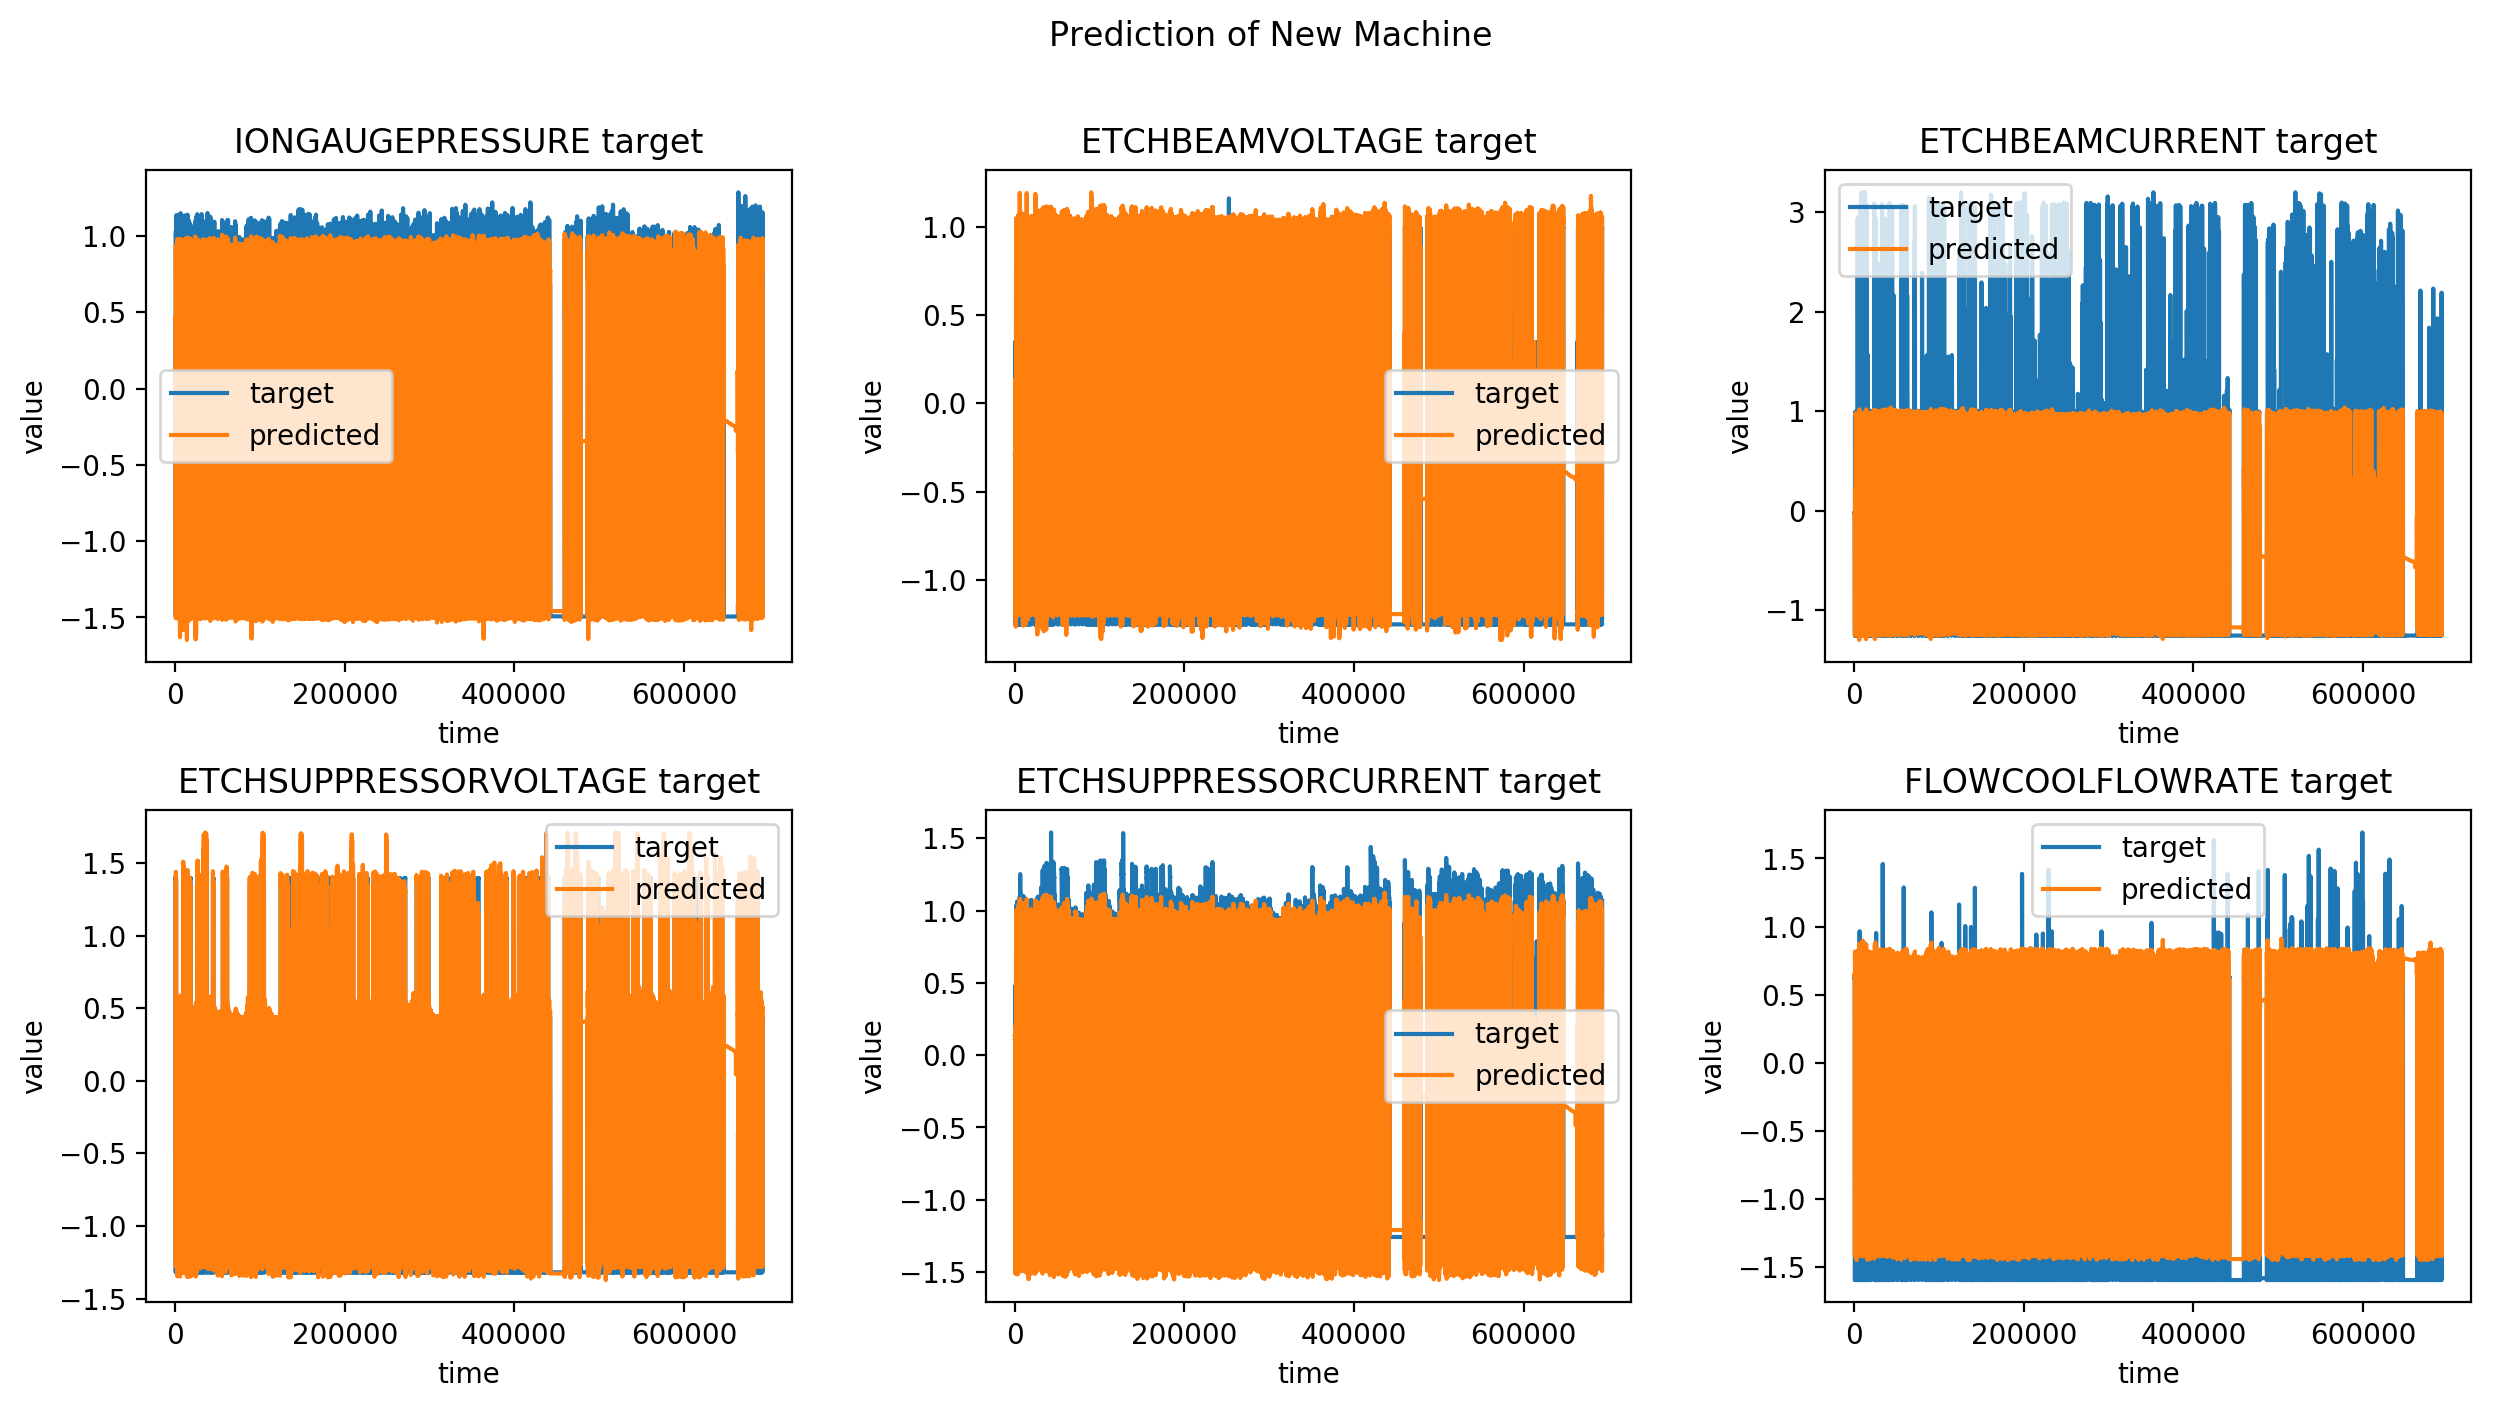

In [7]:
visualize_prediction(first_f=1, 
                     last_f=7, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=phm_data, 
                     title="Prediction of New Machine", 
                     line=False
                    )
plt.show()

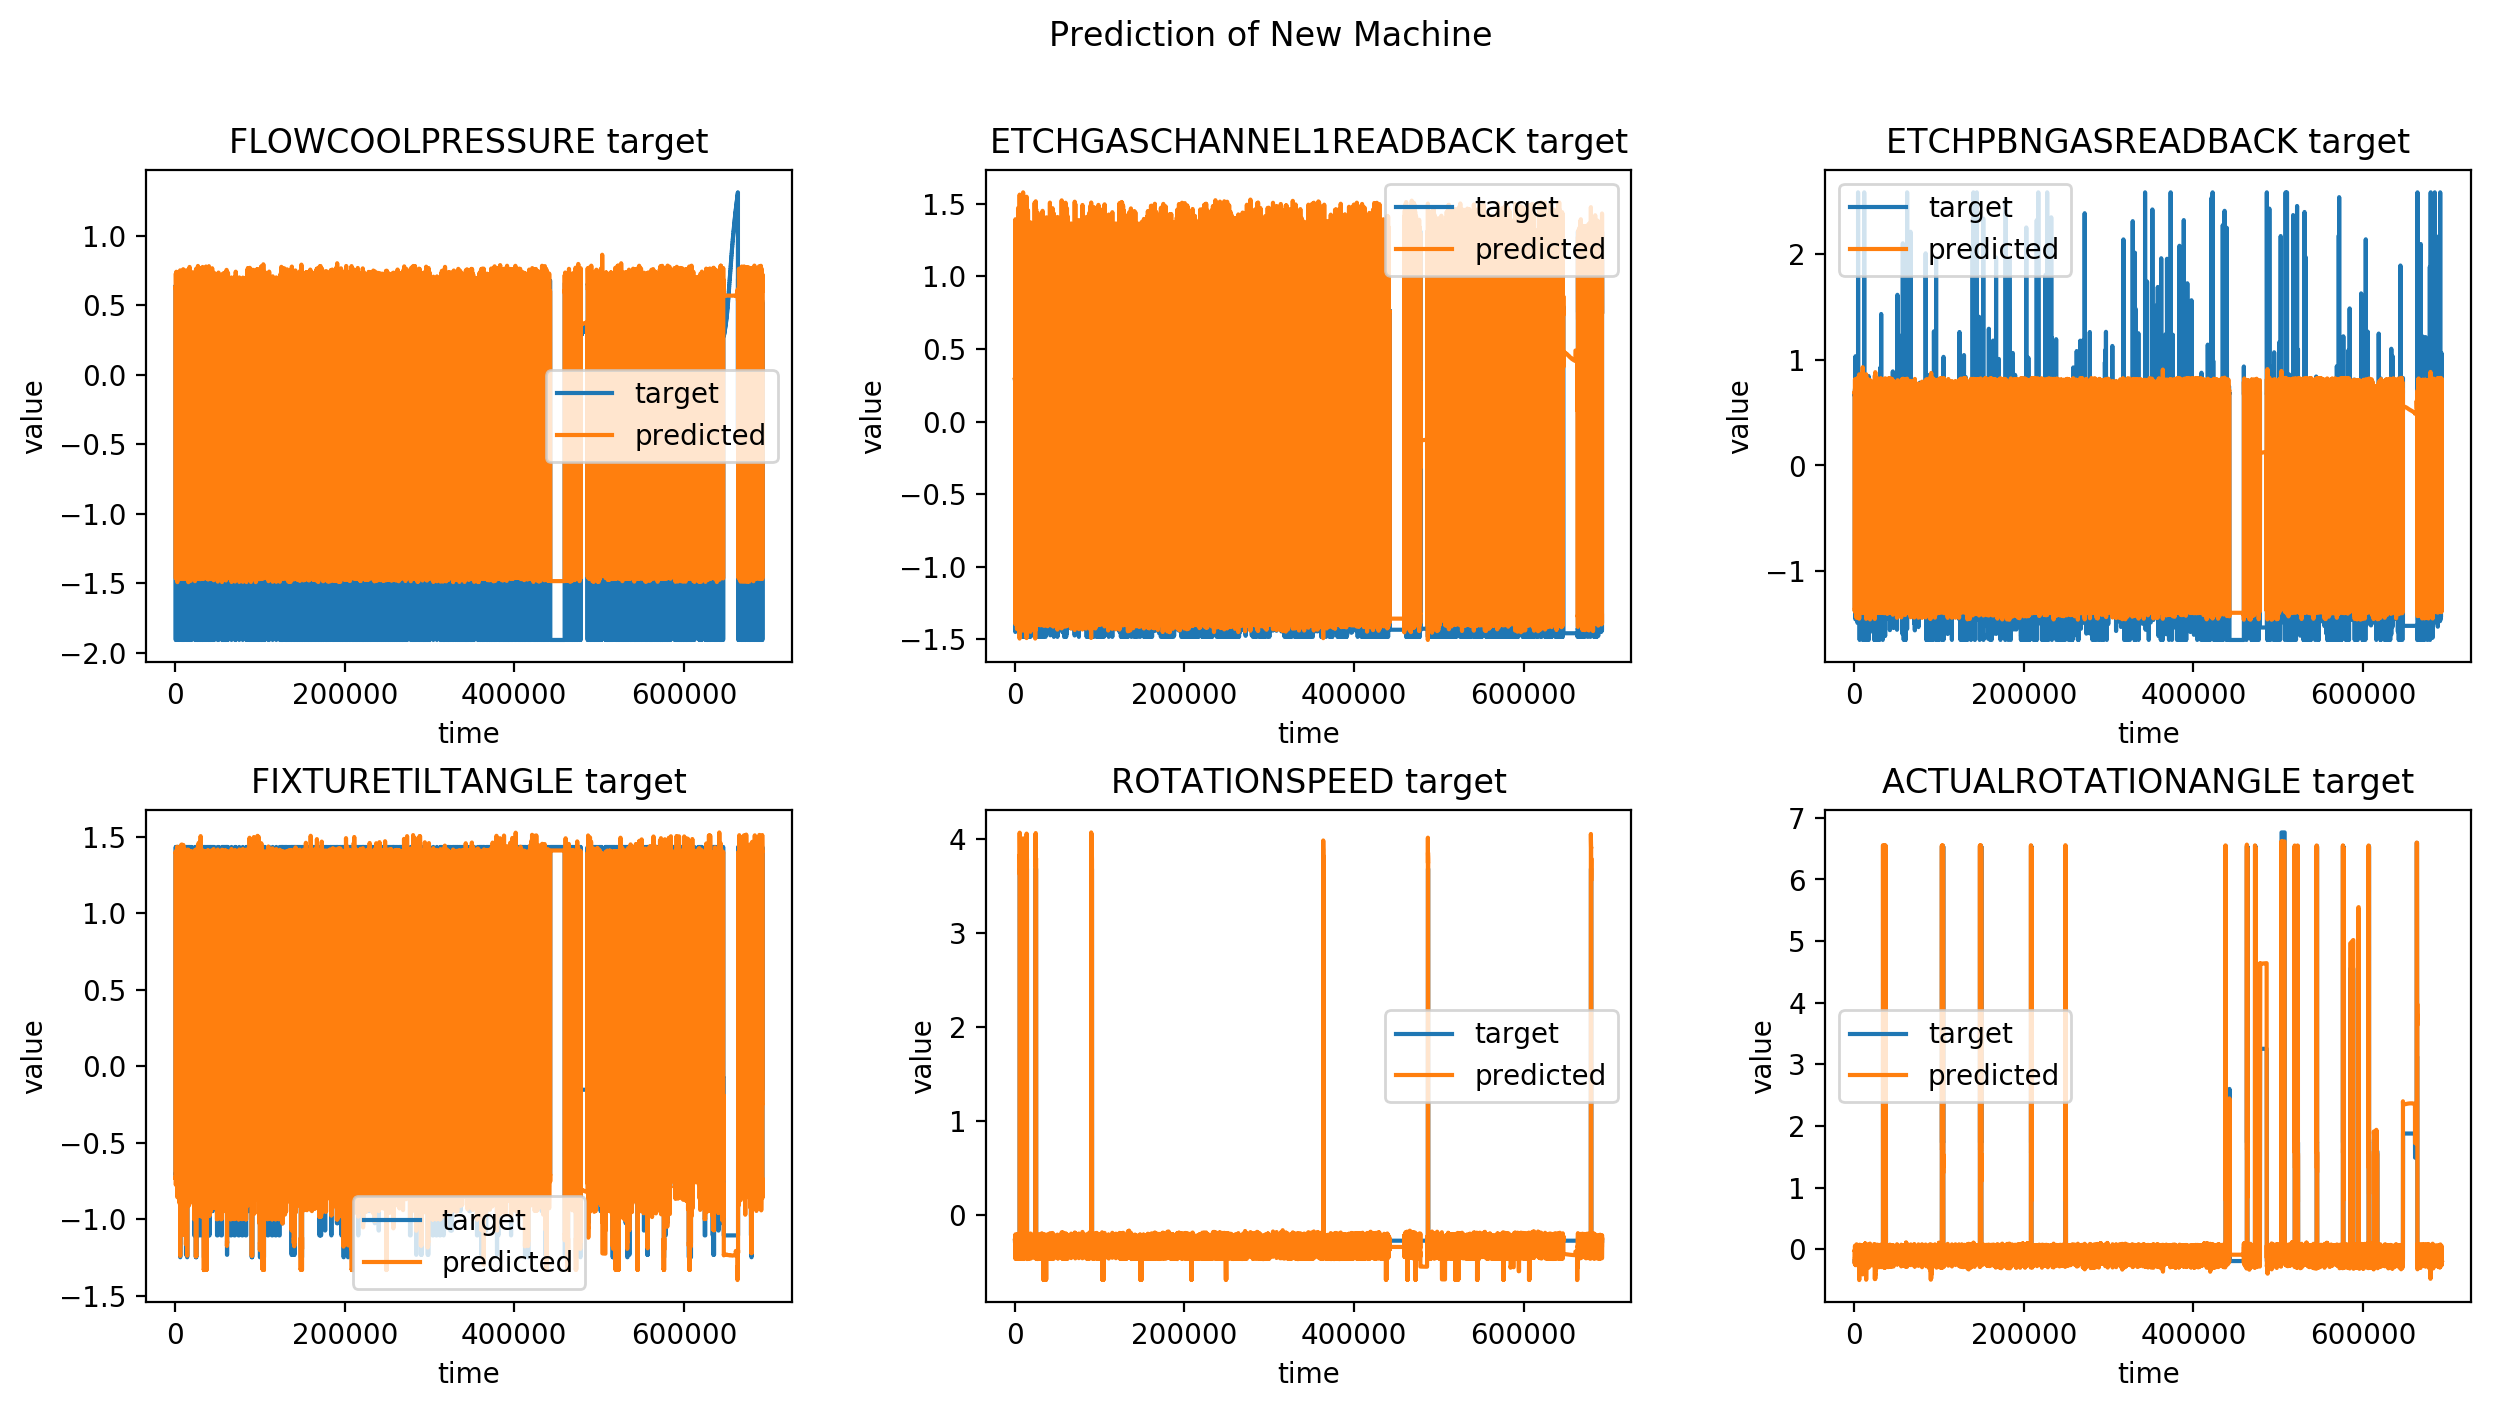

In [6]:
visualize_prediction(first_f=7, 
                     last_f=13, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=phm_data, 
                     title="Prediction of New Machine", 
                     line=False
                    )
plt.show()

## Prediction loss

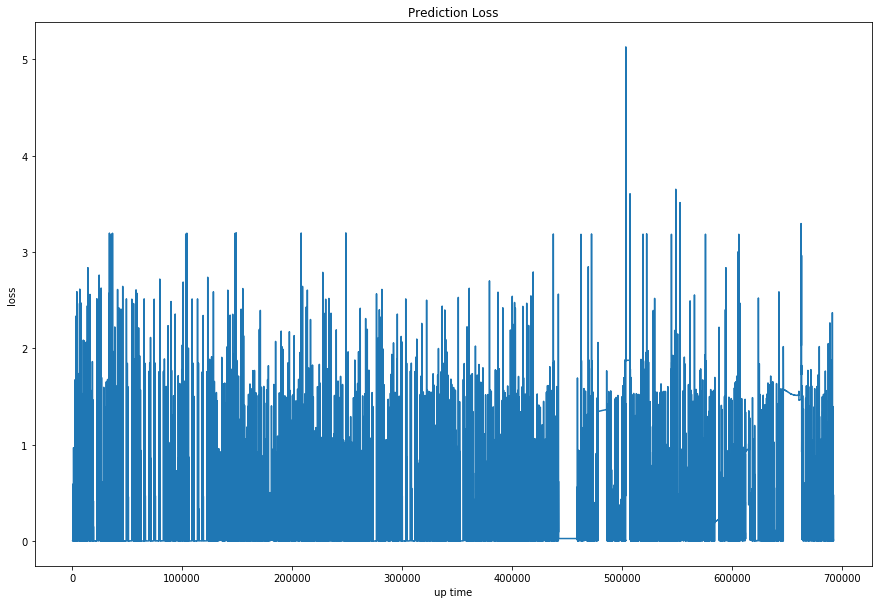

In [5]:
loss_data = phm_data.loc[:,["up time", "loss"]]
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=loss_data, x="up time", y="loss")
axes.set_title("Prediction Loss")
plt.show()

### Smooth data for better distinction
#### Moving averages

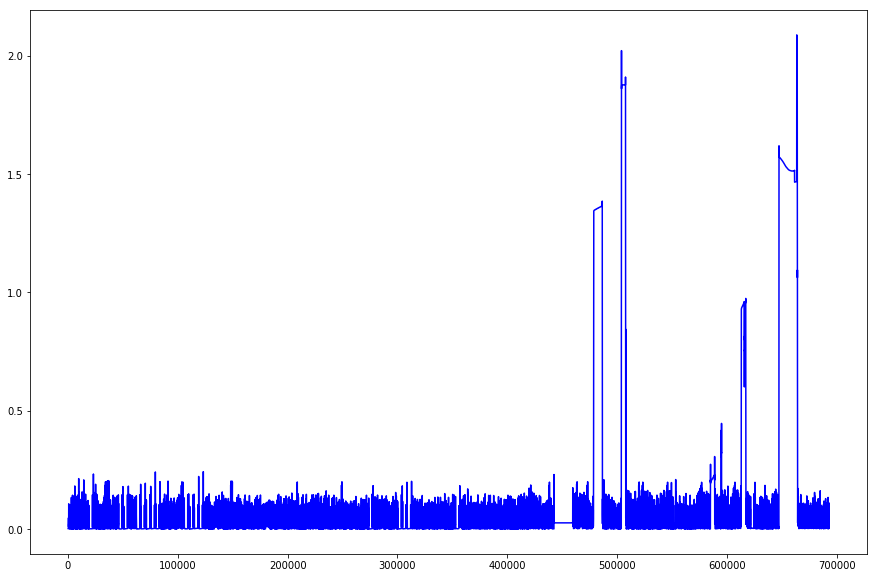

In [21]:
rolling_mean = phm_data.loss.rolling(window=20).mean()
fig, axes = plt.subplots(1, 1, figsize=(15,10))
plt.plot(phm_data["up time"], rolling_mean, label='AMD 20 Day SMA', color='blue')
plt.show()

#### Exponential moving average

In [5]:
# Smooth loss for better visualisation
loss_smoothed=smooth_data(phm_data, 0.05, ["loss"])

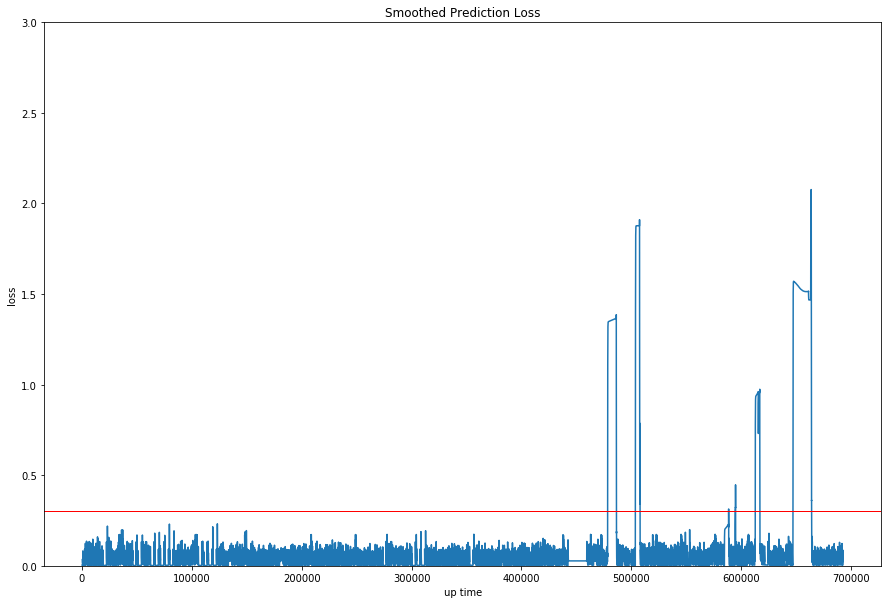

In [38]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=loss_smoothed, x="up time", y="loss")
plt.ylim((0, 3))
plt.axhline(0.3, 0,700000, color="r", linestyle ="-", linewidth=1)
axes.set_title("Smoothed Prediction Loss")
plt.show()

### Period with low loss

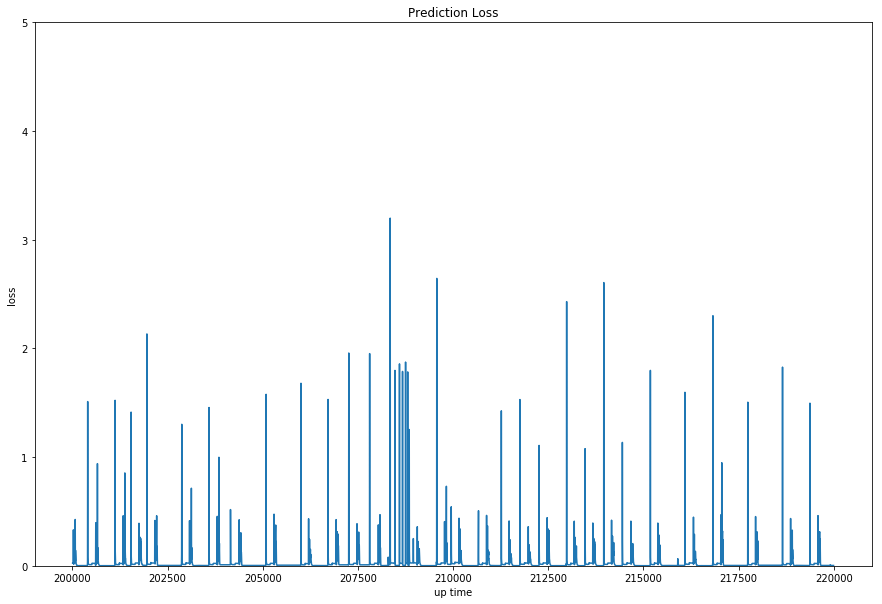

In [12]:
subset_low_loss = phm_data.loc[(phm_data["up time"]>200000) & (phm_data["up time"]<220000)]
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=subset_low_loss, x="up time", y="loss")
axes.set_title("Prediction Loss")
axes.set_ylim([0,5])
plt.show()

### Period with high loss

In [24]:
subset_high_loss = phm_data.loc[(phm_data["up time"]>480000) & (phm_data["up time"]<600000)]

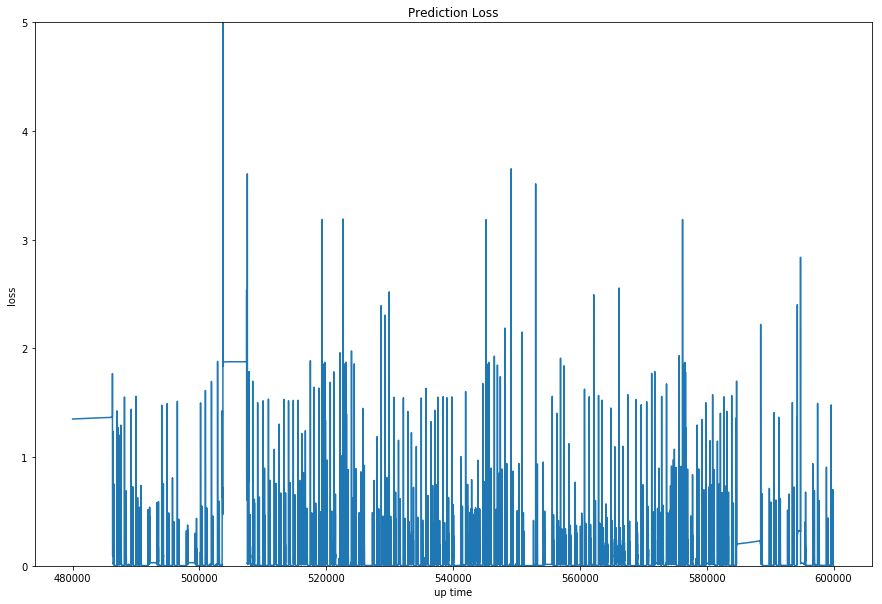

In [22]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=subset_high_loss, x="up time", y="loss")
axes.set_title("Prediction Loss")
axes.set_ylim([0,5])
plt.show()

In [35]:
subset_high_loss_sensor = phm_data.loc[(phm_data["up time"]>610000) & (phm_data["up time"]<620000)]

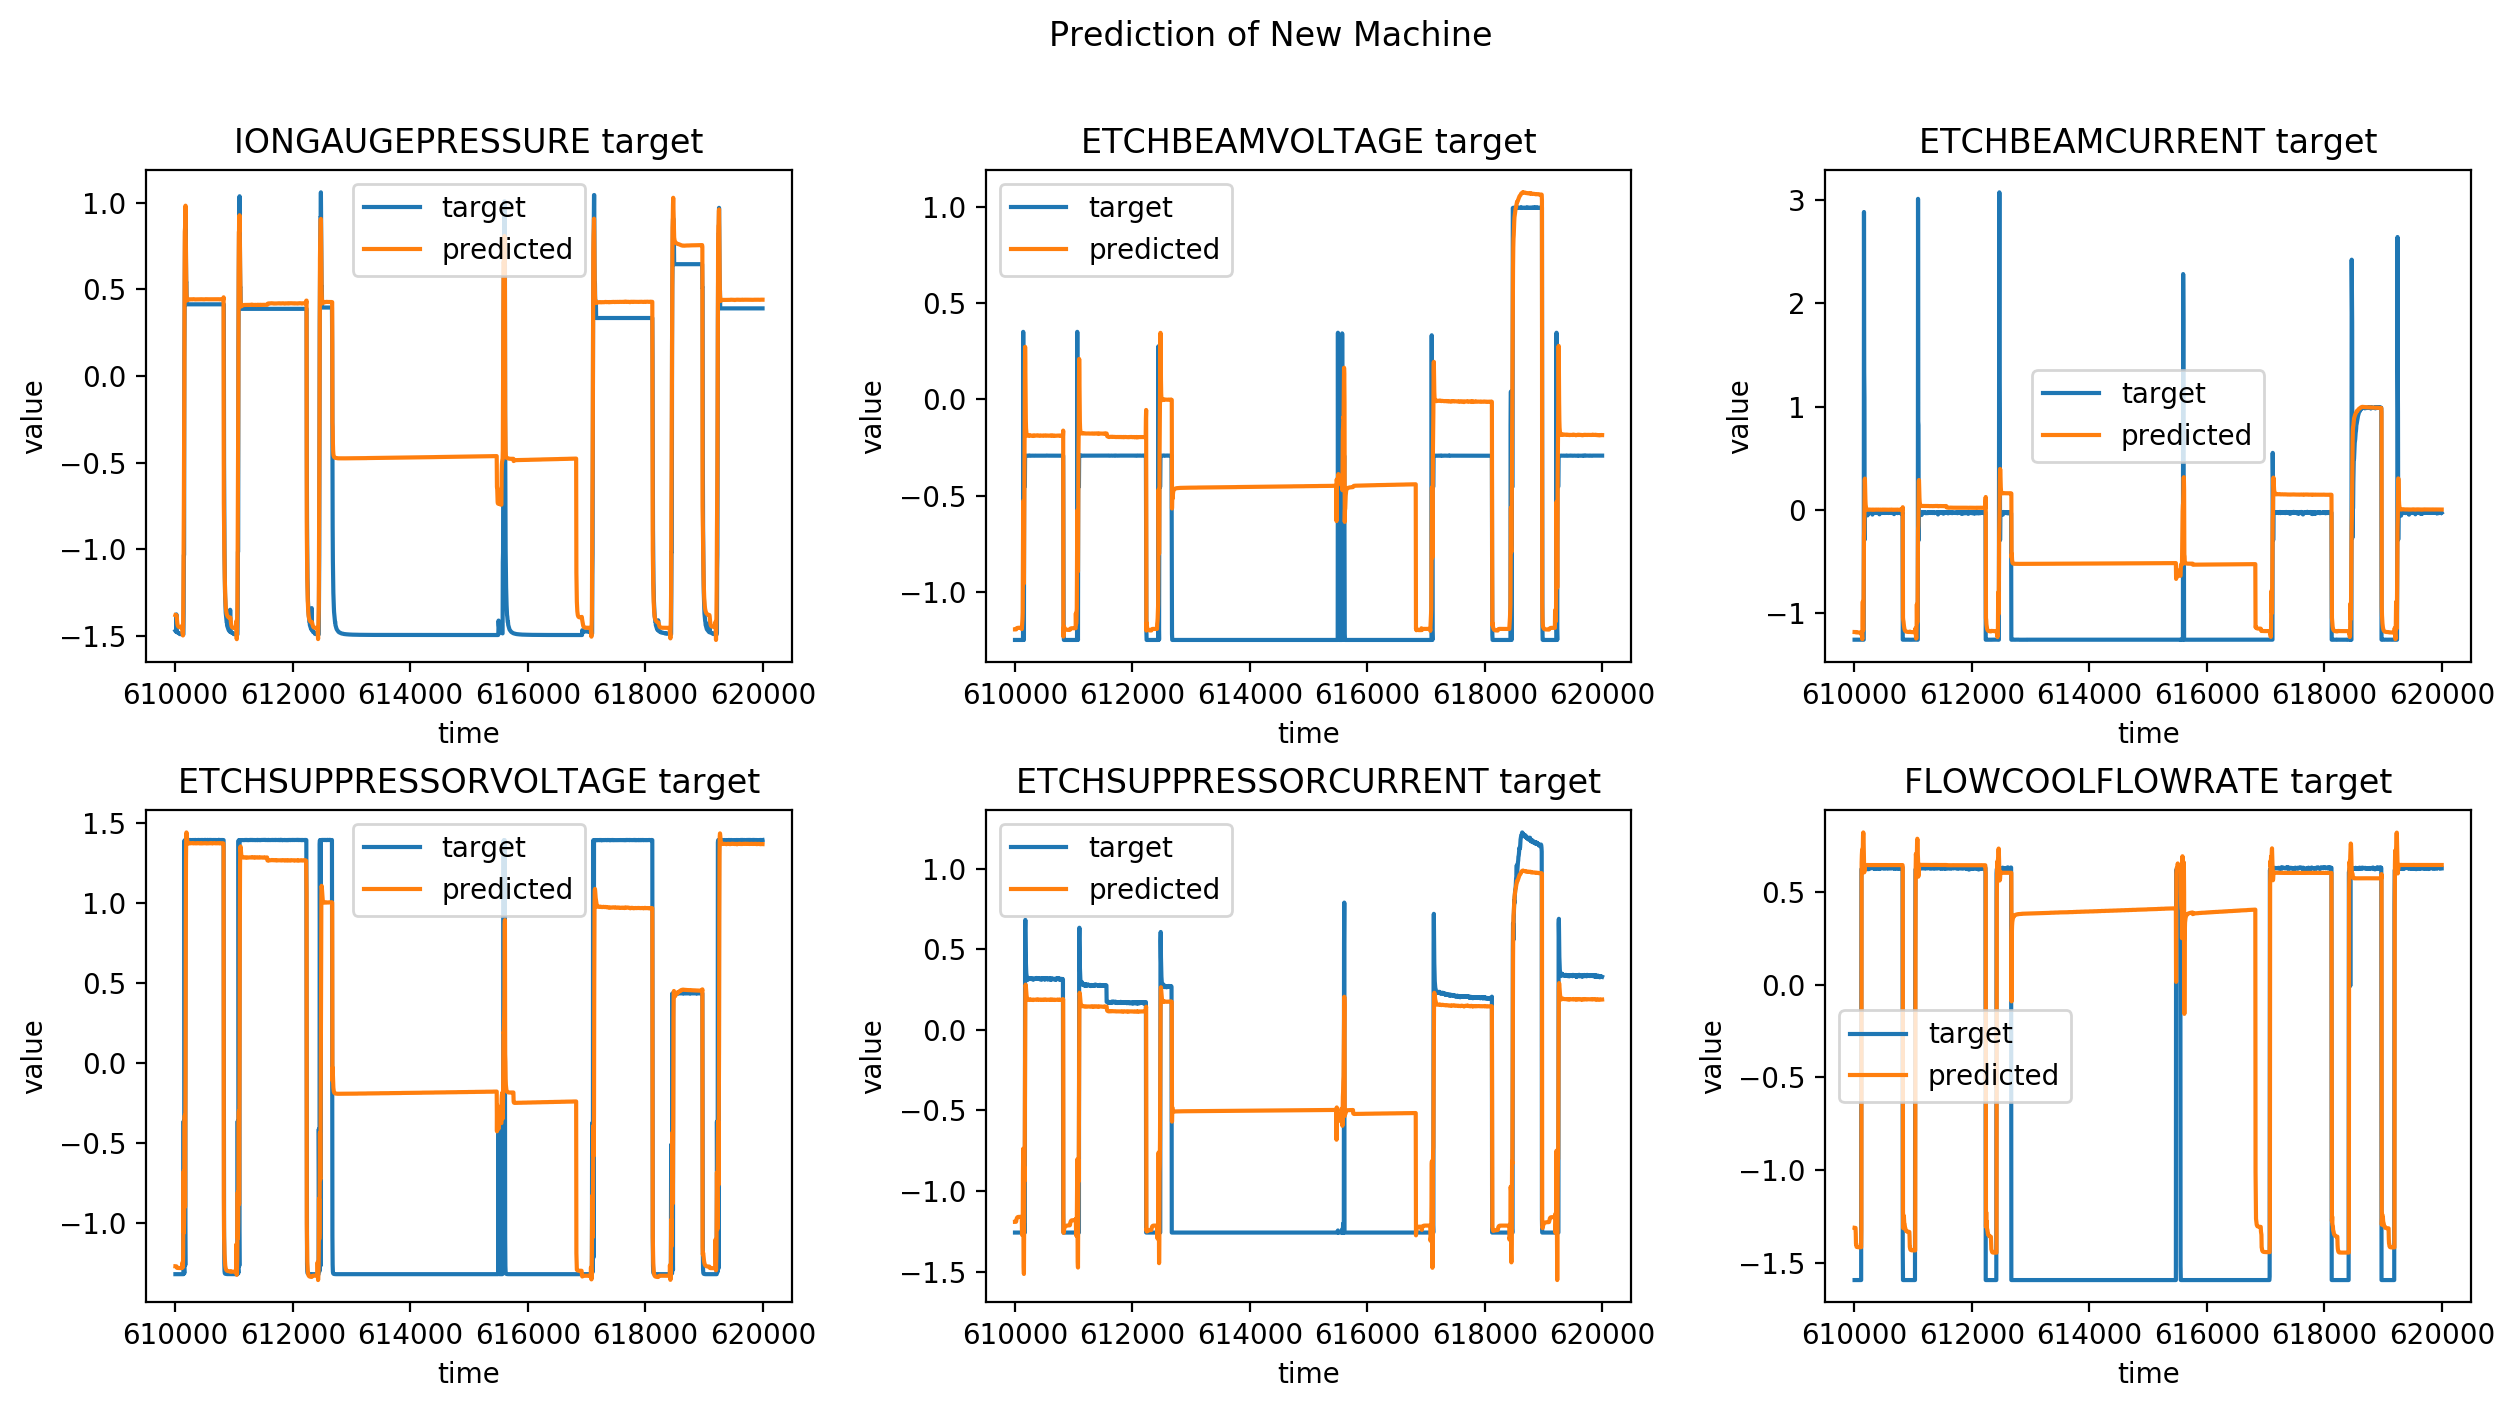

In [36]:
visualize_prediction(first_f=1, 
                     last_f=7, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_high_loss_sensor, 
                     title="Prediction of New Machine", 
                     line=False
                    )
plt.show()

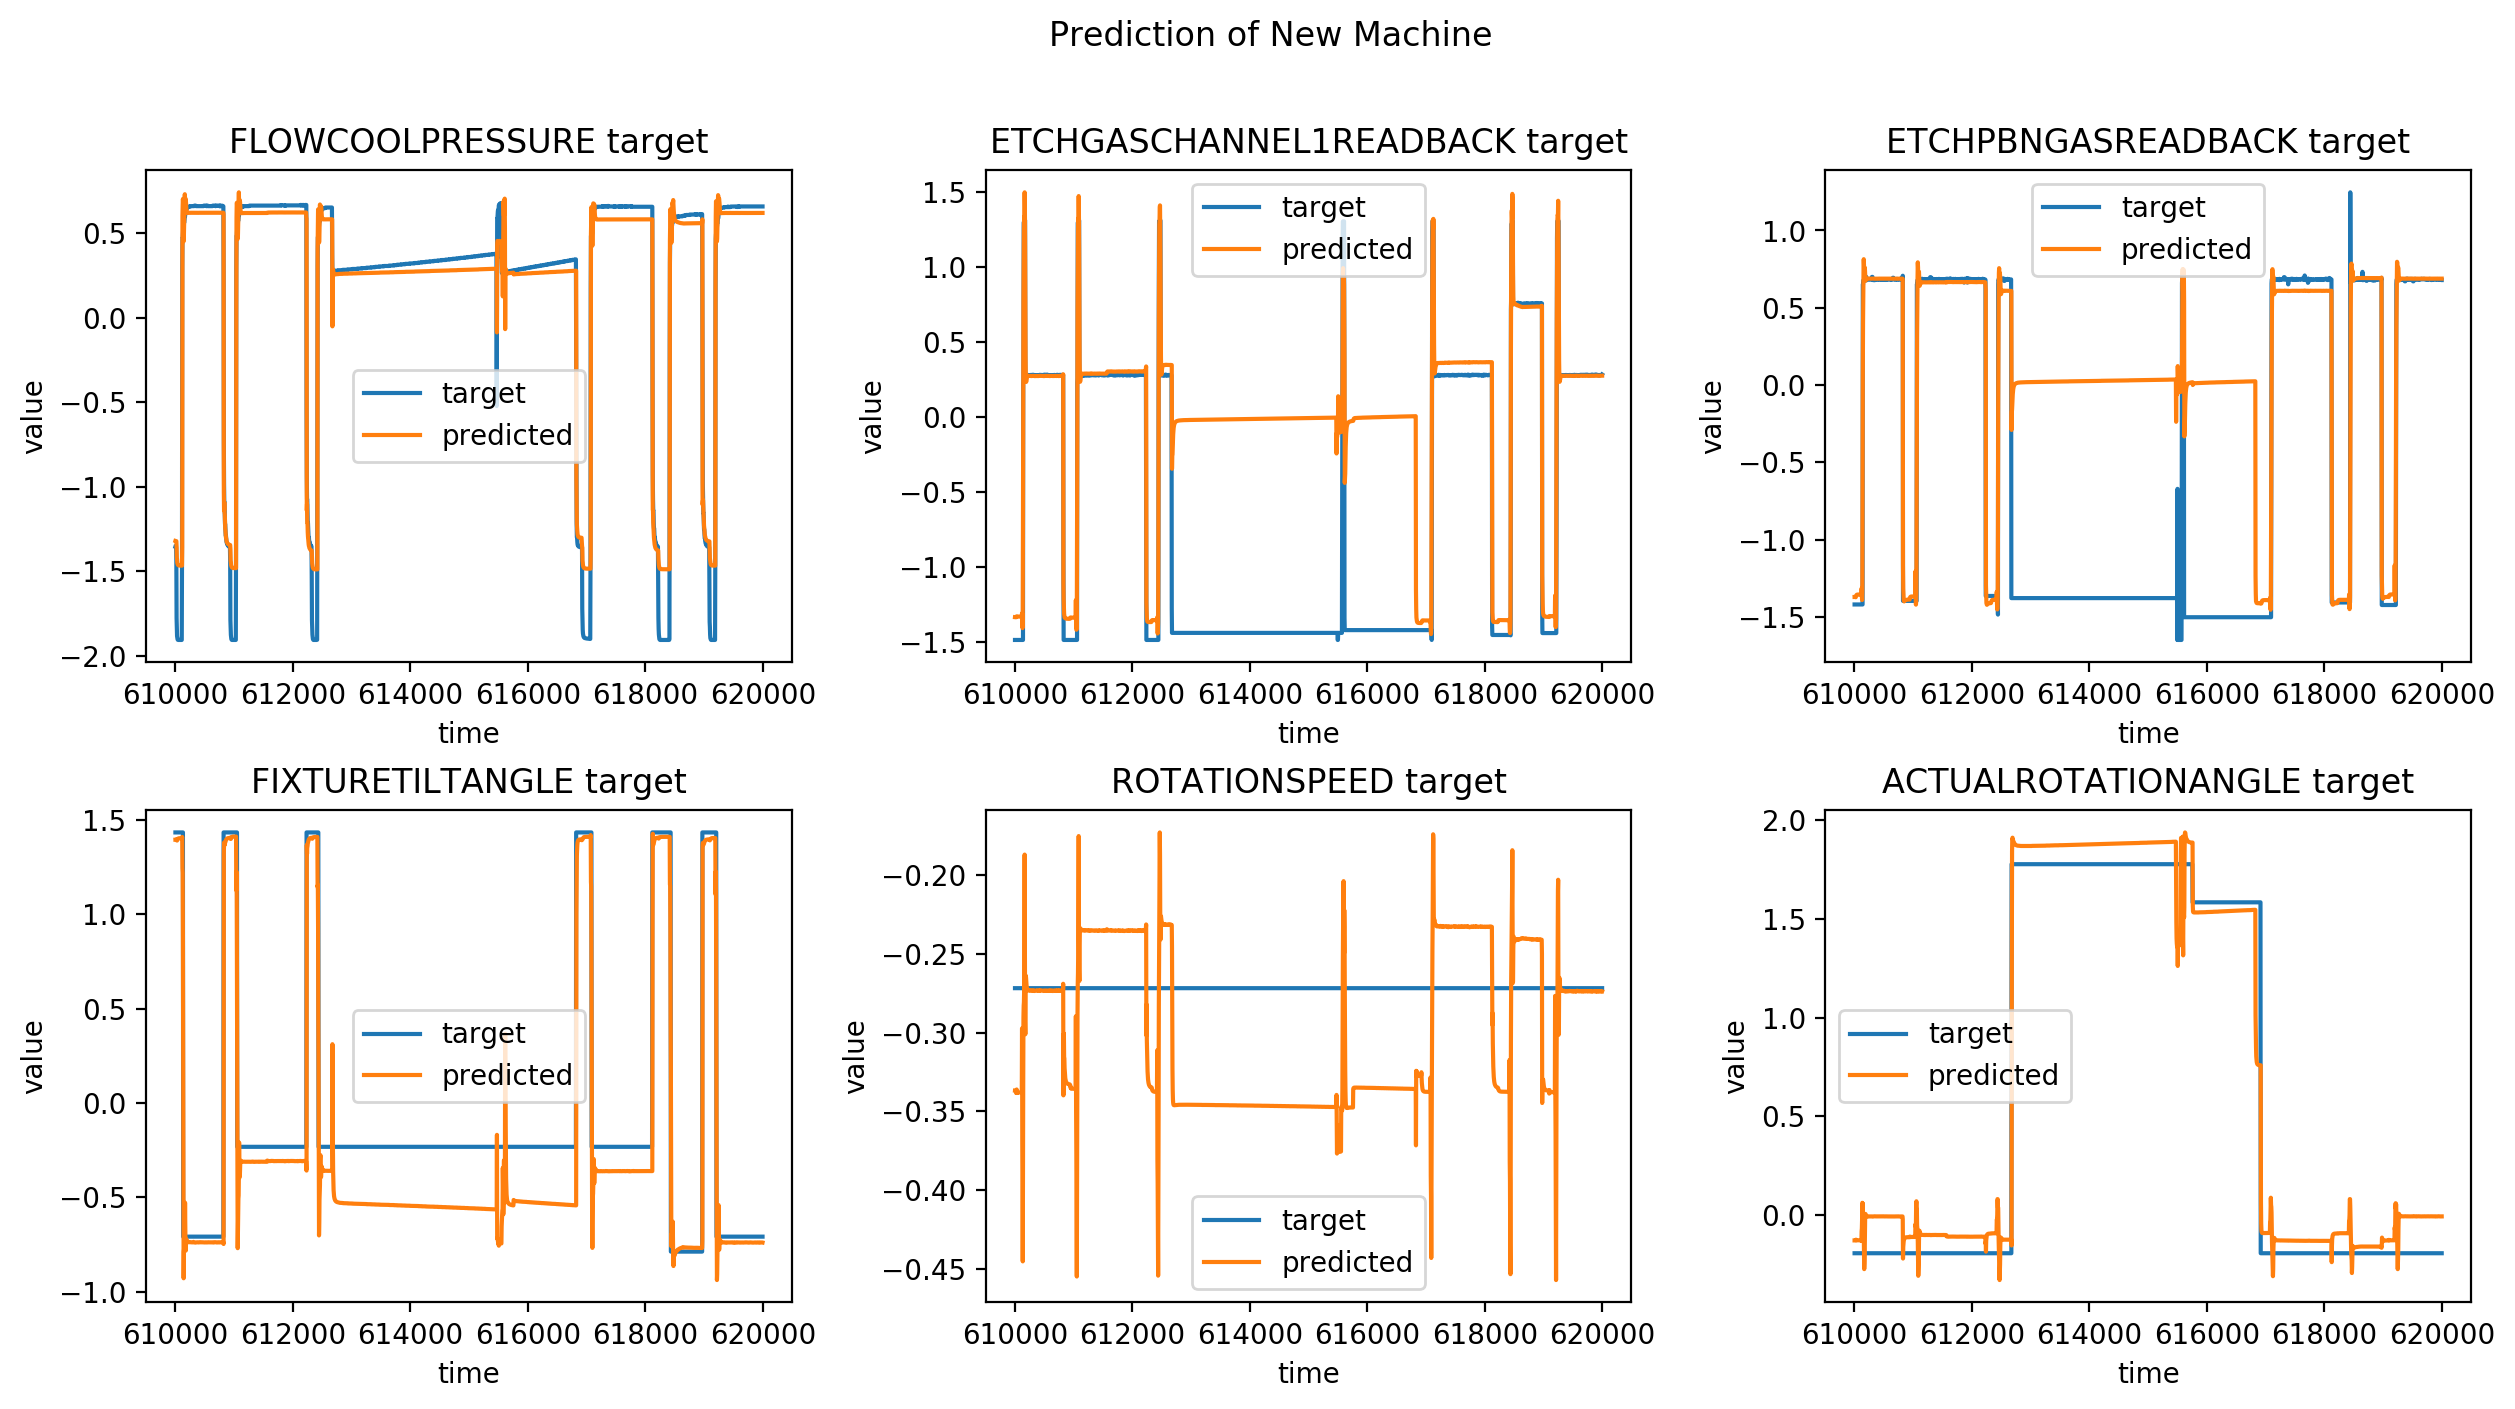

In [37]:
visualize_prediction(first_f=7, 
                     last_f=13, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_high_loss_sensor, 
                     title="Prediction of New Machine", 
                     line=False
                    )
plt.show()

### Share of Loss for each Signal

In [18]:
# Smooth share of loss per sensor for better visualisation
share_of_loss_smoothed=smooth_data(phm_data, 0.0001, ['IONGAUGEPRESSURE share of loss ', 'ETCHBEAMVOLTAGE share of loss ',
                                           'ETCHBEAMCURRENT share of loss ', 'ETCHSUPPRESSORVOLTAGE share of loss ',
                                           'ETCHSUPPRESSORCURRENT share of loss ','FLOWCOOLFLOWRATE share of loss ', 'FLOWCOOLPRESSURE share of loss ',
                                           'ETCHGASCHANNEL1READBACK share of loss ', 'ETCHPBNGASREADBACK share of loss ', 'FIXTURETILTANGLE share of loss ',
                                           'ROTATIONSPEED share of loss ', 'ACTUALROTATIONANGLE share of loss ',
                                           'ACTUALSTEPDURATION share of loss '])
columns = share_of_loss_smoothed.columns

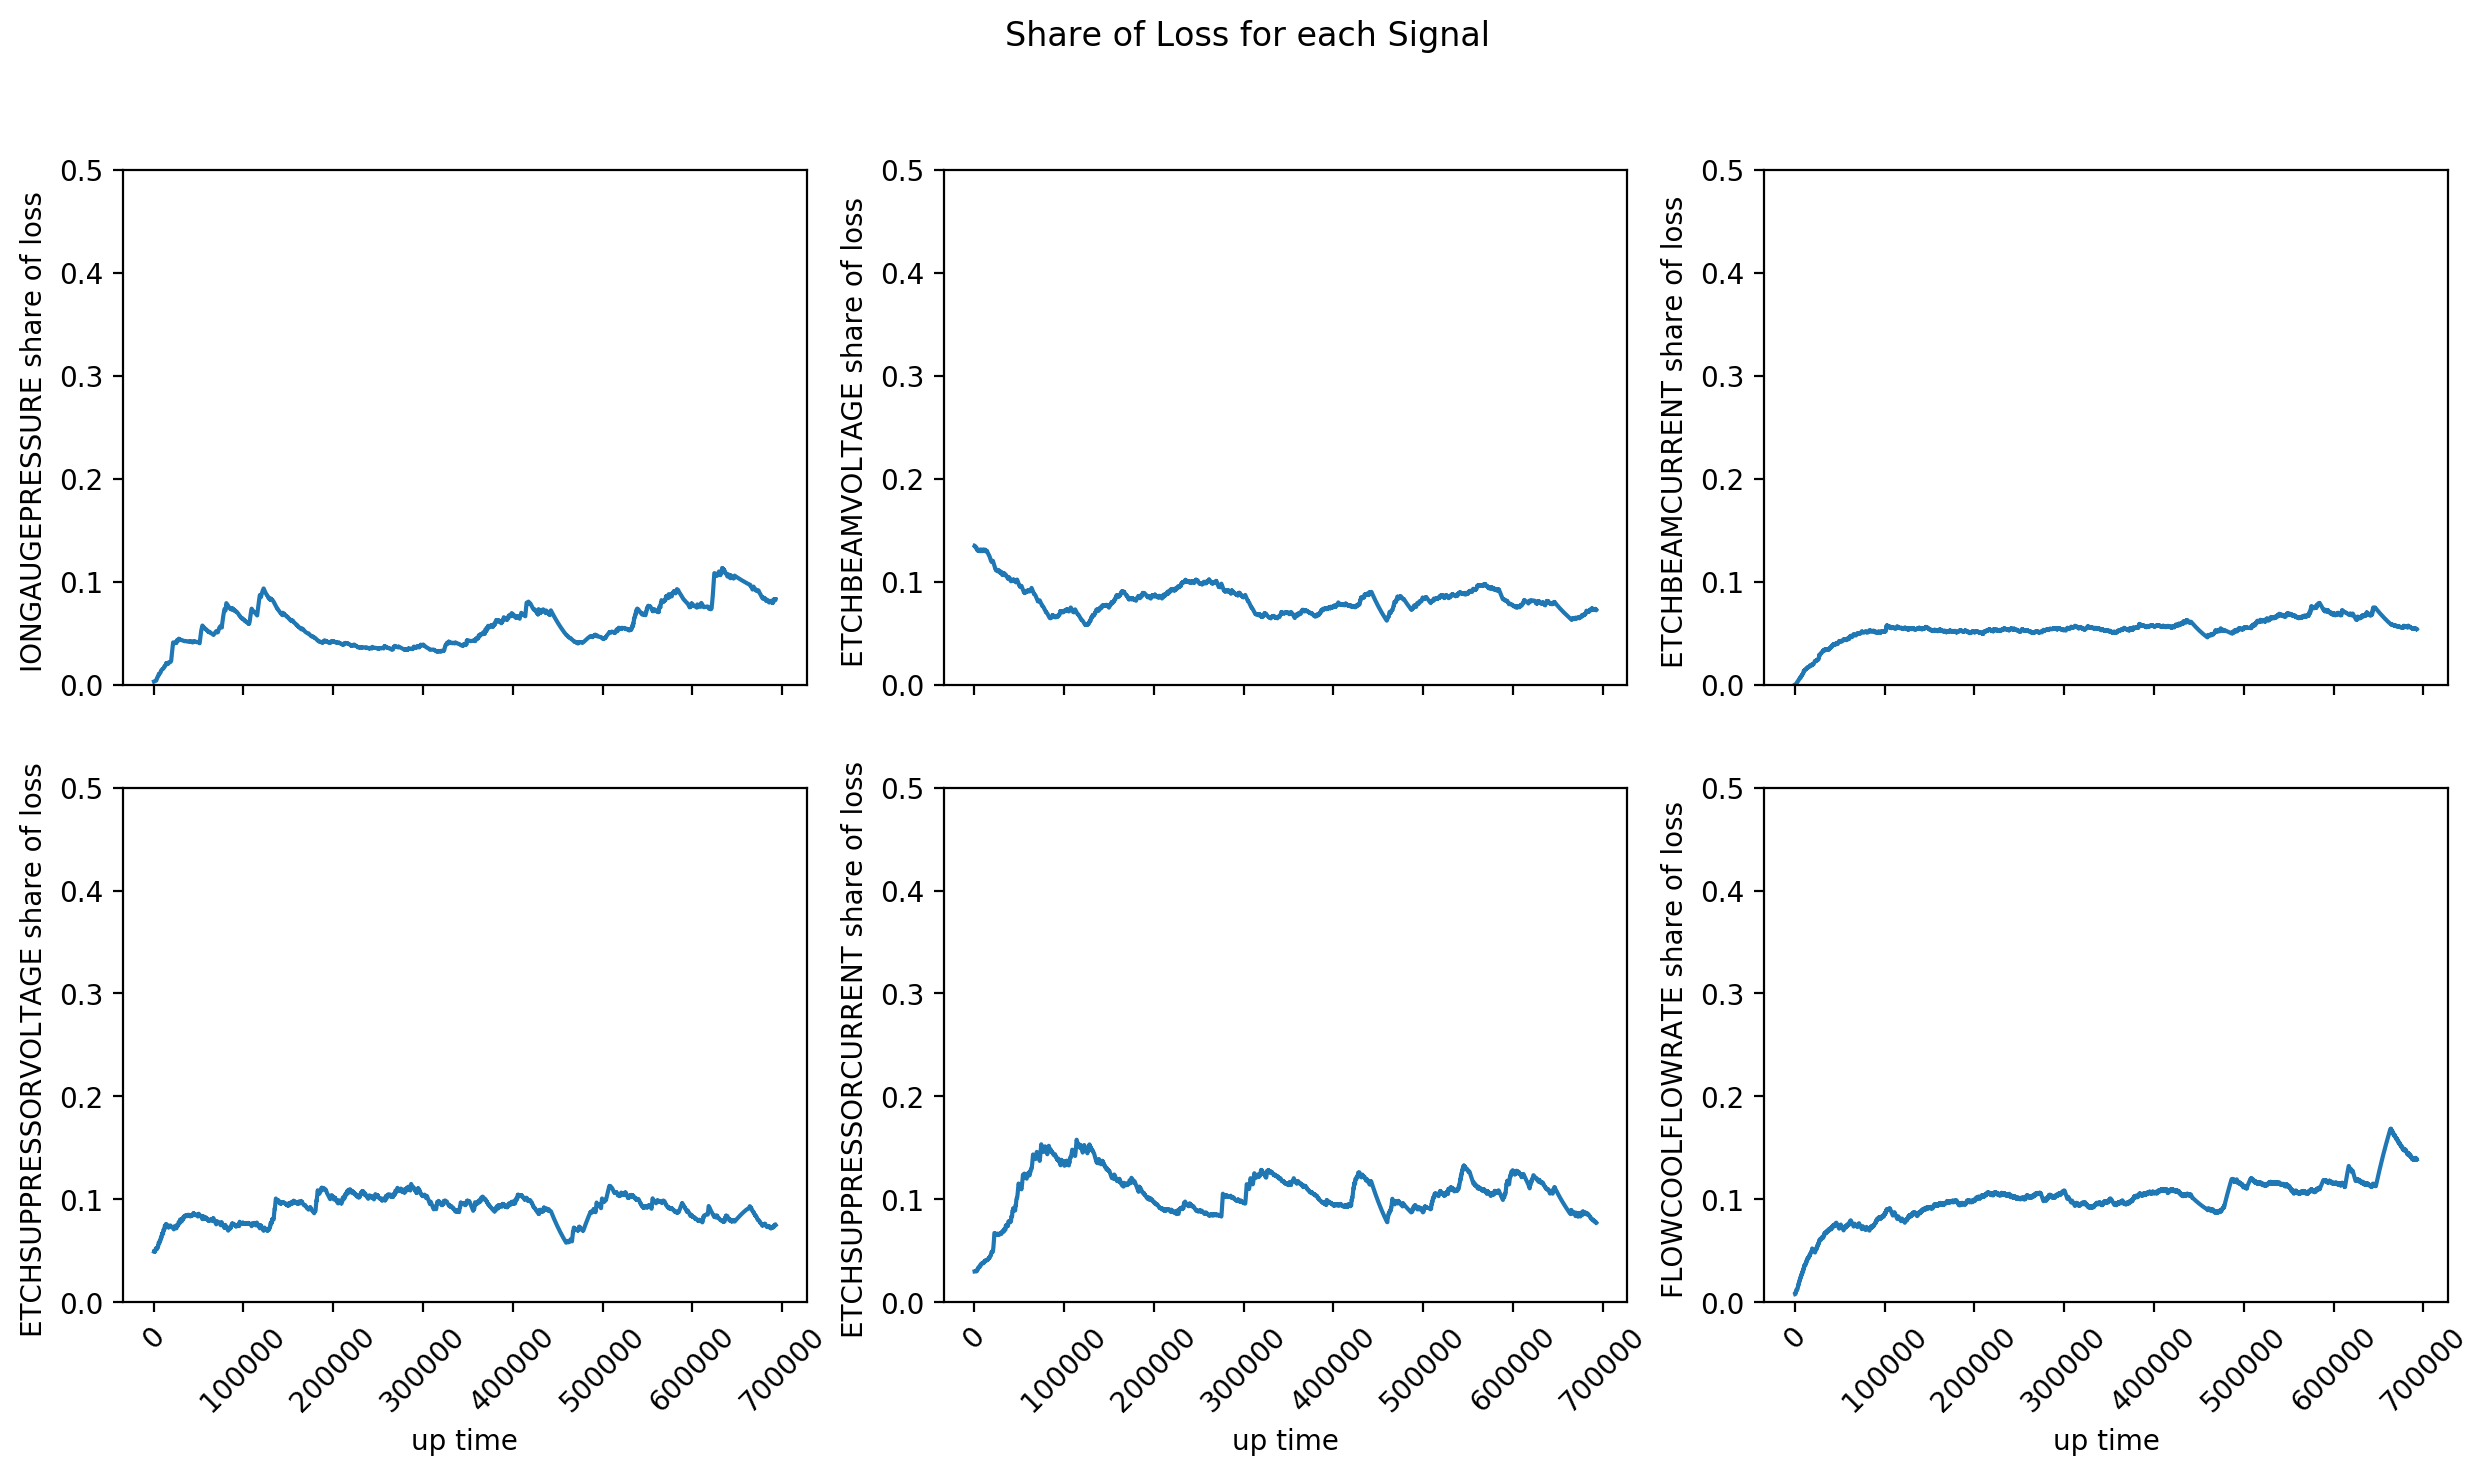

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15,7.5), dpi=200, sharex=True)
ax = axes.ravel()
for i in range(1,7):
    sns.lineplot(data=share_of_loss_smoothed, x="up time", y=columns[i], ax=ax[i-1])
    #ax[i-1].axvspan(1000, 2000, alpha=0.2, color='red')
    ax[i-1].set_ylim([0,0.5])
    plt.setp(ax[i-1].get_xticklabels(), rotation=45) 
fig.suptitle("Share of Loss for each Signal")
plt.show()

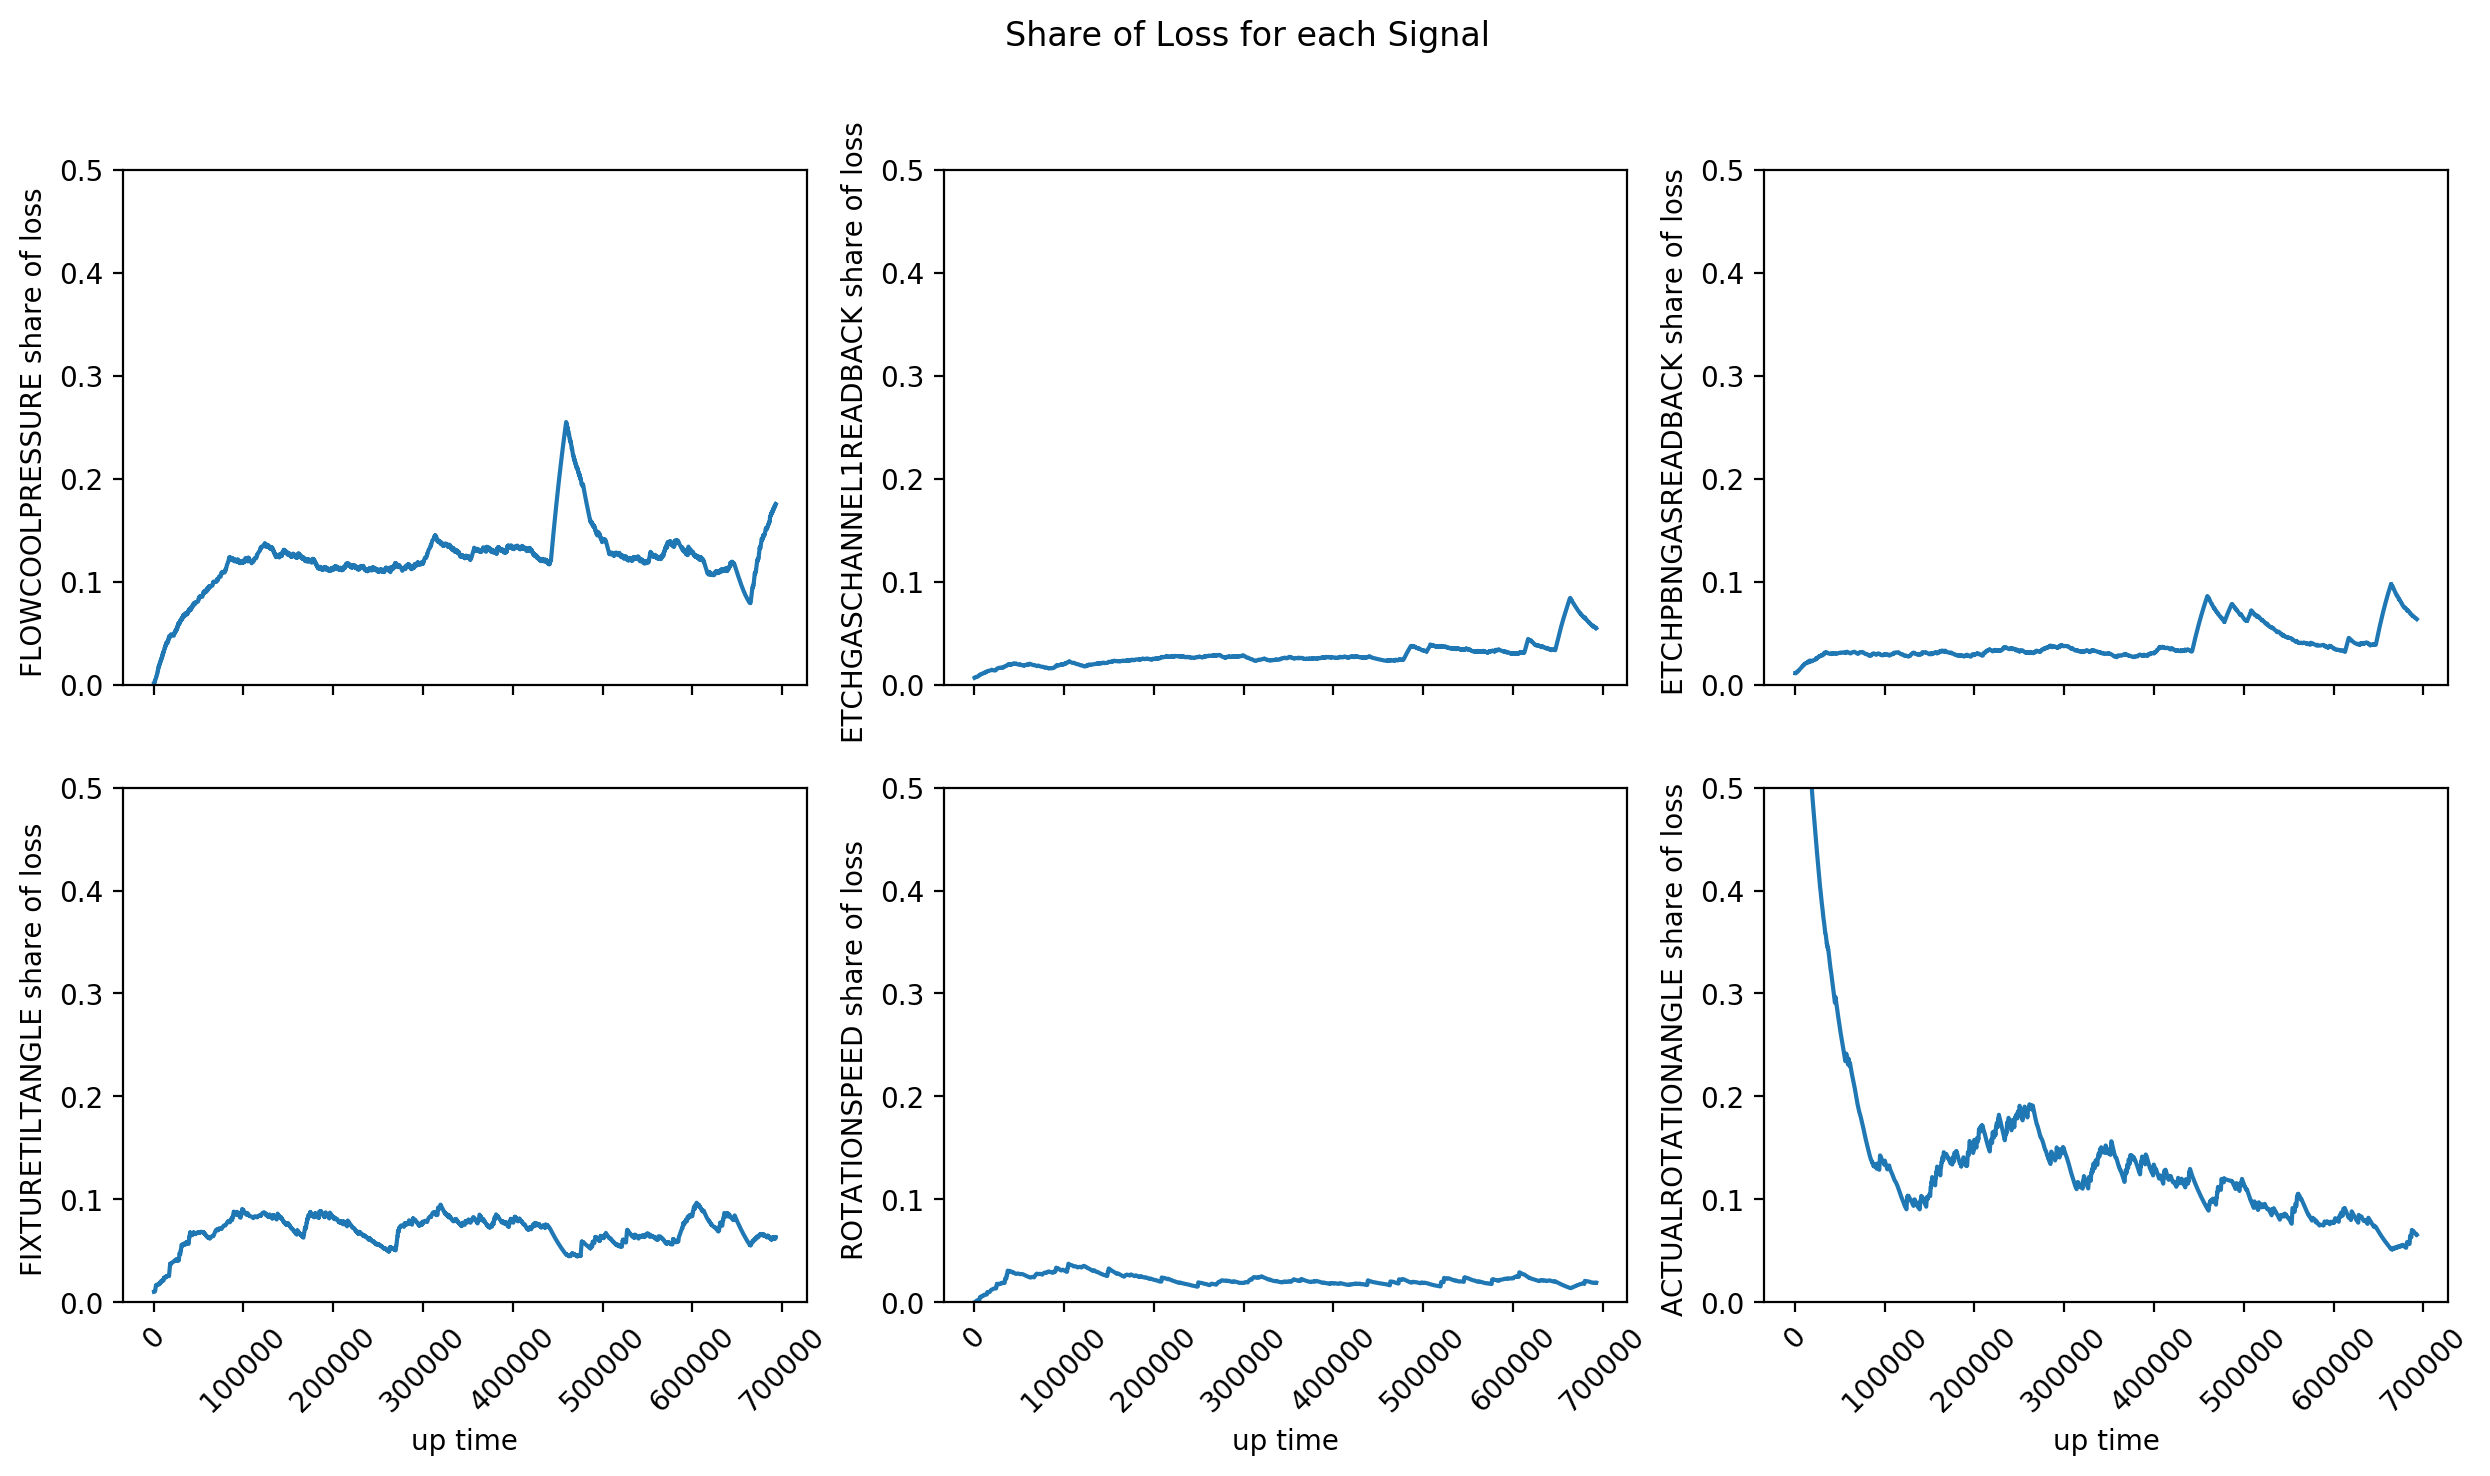

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15,7.5), dpi=200, sharex=True)
ax = axes.ravel()
for i in range(7,13):
    sns.lineplot(data=share_of_loss_smoothed, x="up time", y=columns[i], ax=ax[i-7])
    #ax[i-7].axvspan(1000, 2000, alpha=0.2, color='red')
    ax[i-7].set_ylim([0,0.5])
    plt.setp(ax[i-7].get_xticklabels(), rotation=45) 
fig.suptitle("Share of Loss for each Signal")
plt.show()

(0, 0.5)

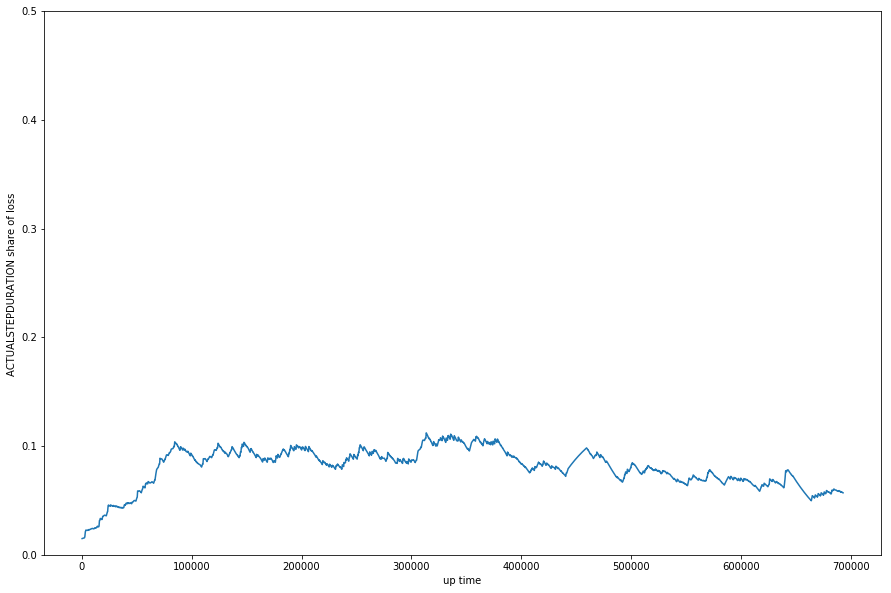

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))
sns.lineplot(data=share_of_loss_smoothed, x="up time", y=columns[13])
plt.ylim((0, 0.5))
